### Word clouds

Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

In [1]:
import os
import numpy as np
from os import path
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import import_ipynb
from utilities import timer, create_directory
from preprocessing import preprocessing

word_cloud_directory = "./word_cloud_output"
# create a directory for word clouds
create_directory(word_cloud_directory)

"""
word_cloud: creates a word cloud from a dataframe column
                        
arguments:
    dataframe:   dataframe
    column_name: string
    title:       string
    max_words:   int
"""
def word_cloud(dataframe, column_name, title = None, save_word_cloud = False):
    concatenate_all_columns = " ".join(dataframe[column_name])
    wordcloud = WordCloud(background_color = "white", max_words = 1000,
                          max_font_size = 40, scale = 3, random_state = 0)
    wordcloud.generate(concatenate_all_columns)
    plt.figure(1, figsize=(20,20))
    if title is not None:
        plt.title(title, fontsize=20)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    # save word cloud plot as png
    if (save_word_cloud is True) and (title is not None):
        wordcloud.to_file(f"{word_cloud_directory}/{title.lower()}.png")
        
"""
word_cloud_mask: creates a word cloud from a dataframe column
                 with image mask
                        
arguments:
    dataframe:   dataframe
    column_name: string
    title:       string
    max_words:   int
"""
def word_cloud_mask(dataframe, column_name, mask, title = None, save_word_cloud = False):
    my_mask = np.array(Image.open(mask))
    concatenate_all_columns = " ".join(dataframe[column_name])
    wordcloud = WordCloud(background_color = "white", max_words = 1000,
                          max_font_size = 40, scale = 3, random_state = 0,
                          mask = my_mask)
    wordcloud.generate(concatenate_all_columns)
    plt.figure(1, figsize=(20,20))
    if title is not None:
        plt.title(title, fontsize=20)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    # save word cloud plot as png
    if (save_word_cloud is True) and (title is not None):
        wordcloud.to_file(f"{word_cloud_directory}/{title.lower()}.png")

importing Jupyter notebook from utilities.ipynb
importing Jupyter notebook from preprocessing.ipynb


#### Load data set

In [2]:
# load data set
data_set  = pd.read_csv("../data_sets/data_set.tsv", delimiter="\t", names=["id","title","content","category"], header=0)
# display dataframe
display(data_set.head(5))

,id,title,content,category
0,1,Ad sales boost Time Warner profit\n,\n Quarterly profits at US media giant TimeWa...,business
1,2,Dollar gains on Greenspan speech\n,\n The dollar has hit its highest level again...,business
2,3,Yukos unit buyer faces loan claim\n,\n The owners of embattled Russian oil giant ...,business
3,4,High fuel prices hit BA's profits\n,\n British Airways has blamed high fuel price...,business
4,5,Pernod takeover talk lifts Domecq\n,\n Shares in UK drinks and food firm Allied D...,business


#### Preprocessing

In [3]:
start_time = timer()

# concatenate title and content
data_set["title_and_content"] = data_set["title"] + " " + data_set["content"]

# some stop words for better results
more_stop_words = ["say","said","want","thing","may","see","make","look","likely","well","told","uses","used","use","bn","mr","year","people","new"]

# create an object of preprocessing class
preprocess = preprocessing()
# execute preprocessing for "title_and_content" column
data_set = preprocess.clean_stem_lemmatize_tokens_column(data_set, "title_and_content", more_stop_words, True)

# display dataframe
display(data_set.head(5))

timer(start_time)

,id,title,content,category,title_and_content,title_and_content_clean_stems_lemmas,title_and_content_clean_stems_lemmas_tokens
0,1,Ad sales boost Time Warner profit\n,\n Quarterly profits at US media giant TimeWa...,business,Ad sales boost Time Warner profit\n \n Quarte...,ad sale boost time warner profit quarterli pro...,"[ad, sale, boost, time, warner, profit, quarte..."
1,2,Dollar gains on Greenspan speech\n,\n The dollar has hit its highest level again...,business,Dollar gains on Greenspan speech\n \n The dol...,dollar gain greenspan speech dollar hit highes...,"[dollar, gain, greenspan, speech, dollar, hit,..."
2,3,Yukos unit buyer faces loan claim\n,\n The owners of embattled Russian oil giant ...,business,Yukos unit buyer faces loan claim\n \n The ow...,yuko unit buyer face loan claim owner embattl ...,"[yuko, unit, buyer, face, loan, claim, owner, ..."
3,4,High fuel prices hit BA's profits\n,\n British Airways has blamed high fuel price...,business,High fuel prices hit BA's profits\n \n Britis...,high fuel price hit ba profit british airway b...,"[high, fuel, price, hit, ba, profit, british, ..."
4,5,Pernod takeover talk lifts Domecq\n,\n Shares in UK drinks and food firm Allied D...,business,Pernod takeover talk lifts Domecq\n \n Shares...,pernod takeov talk lift domecq share uk drink ...,"[pernod, takeov, talk, lift, domecq, share, uk..."


'Time spent: 0:0:27'

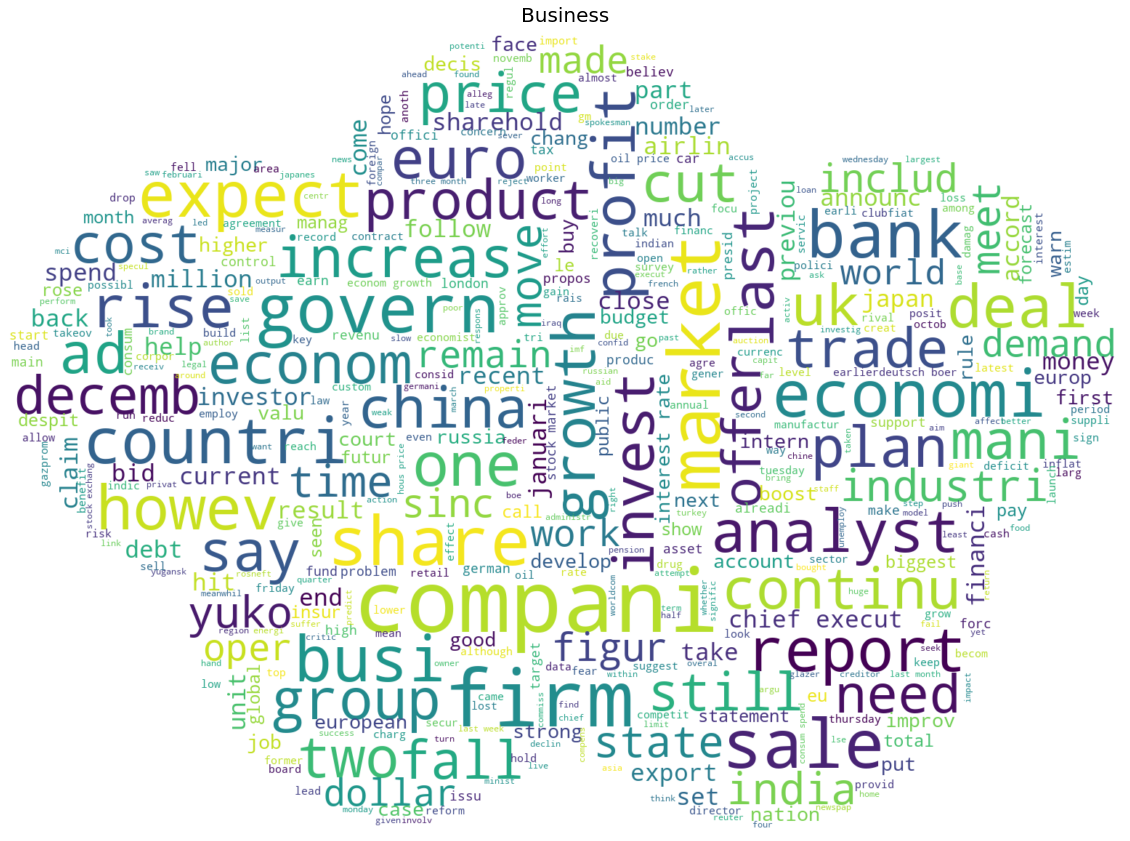

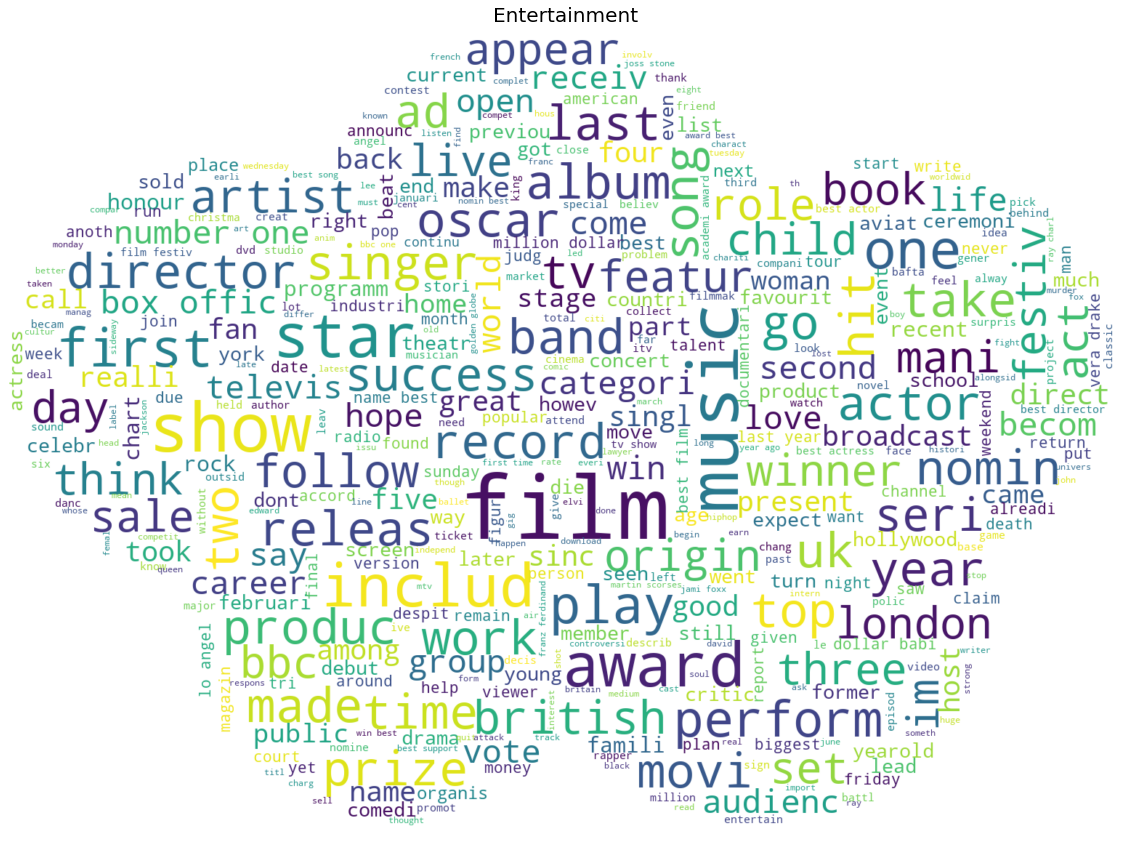

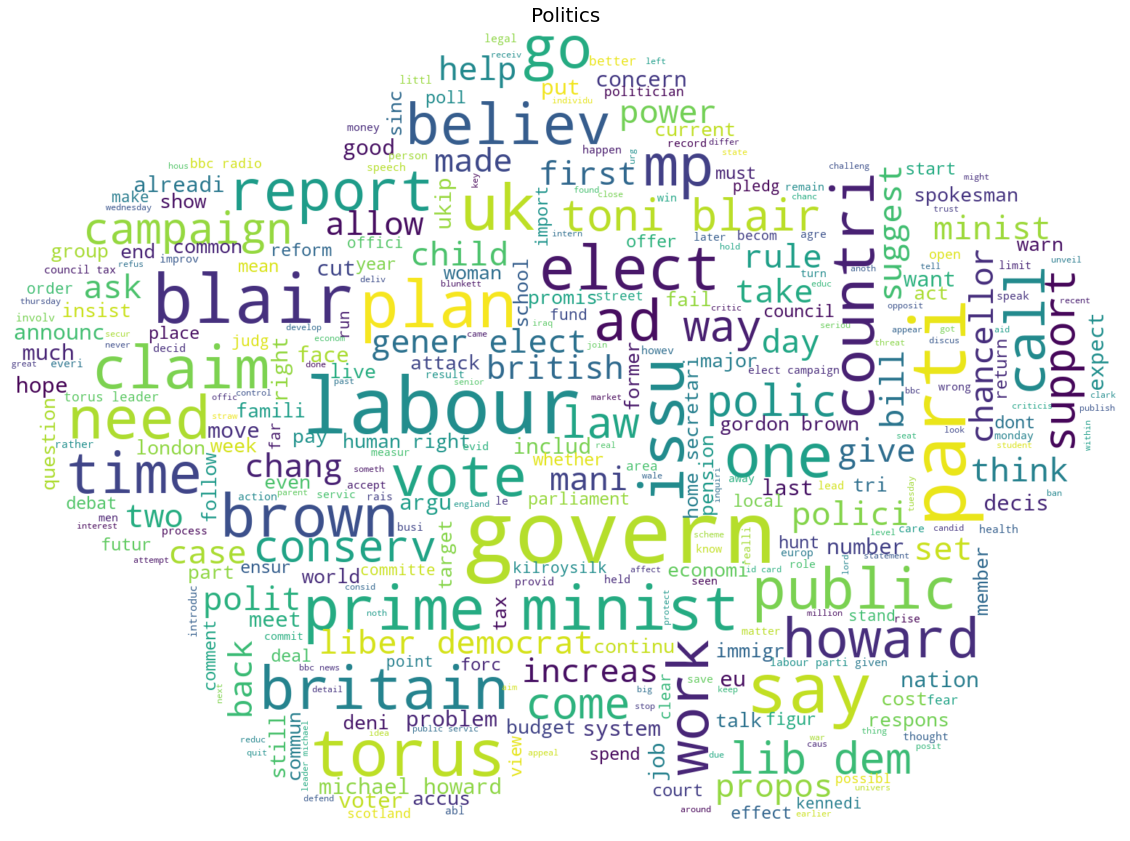

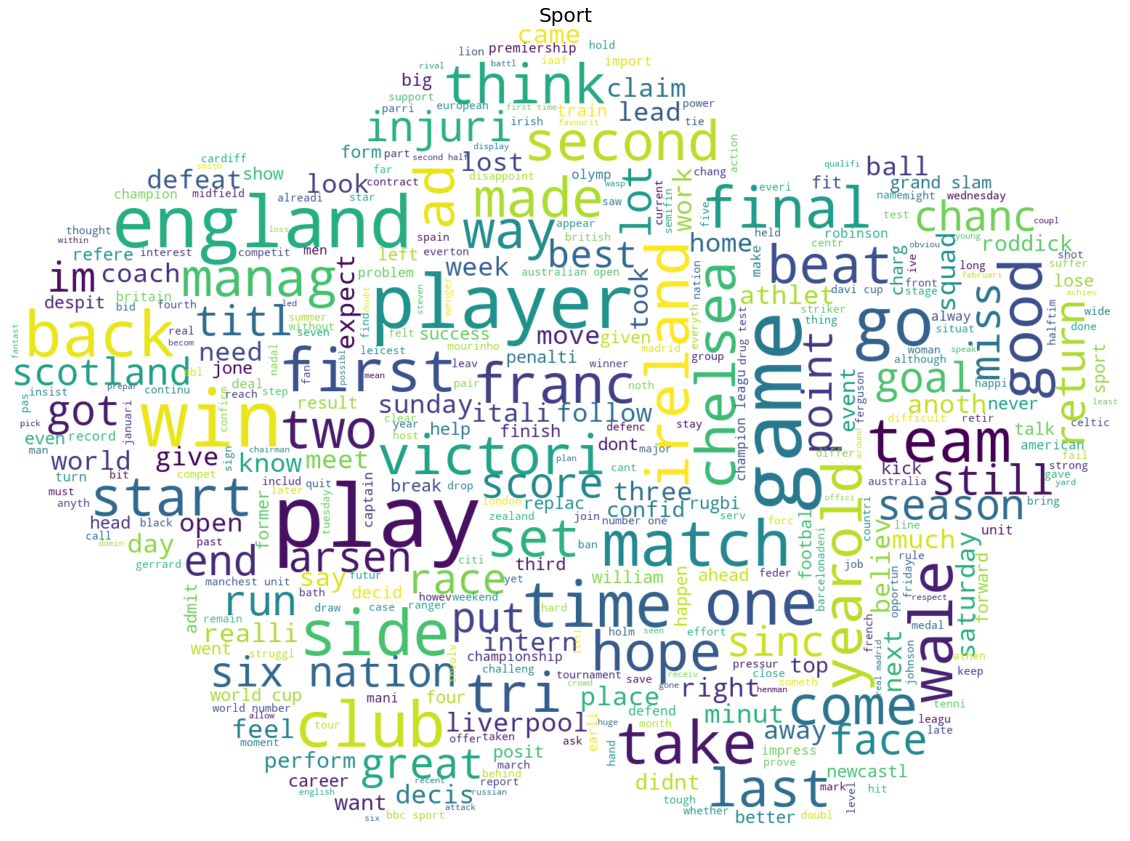

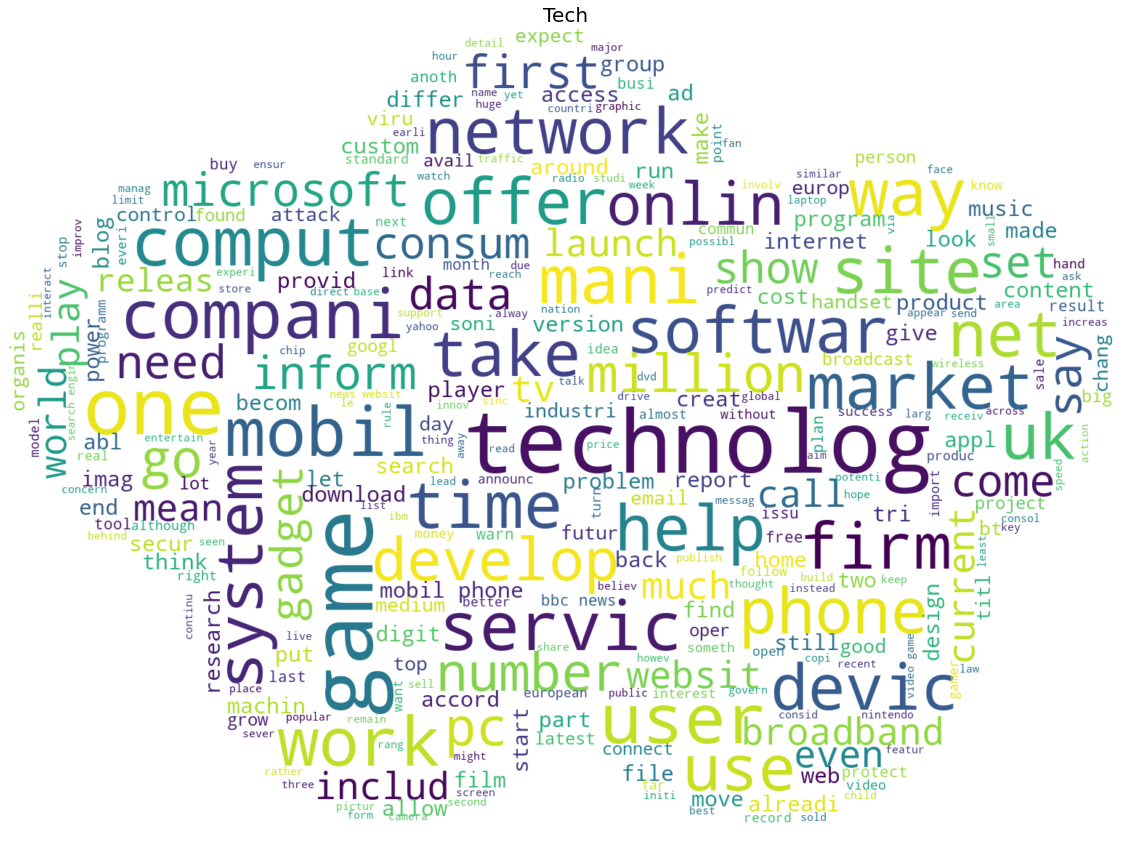

'Time spent: 0:0:17'

In [4]:
start_time = timer()

# create dataframes by category
business      = data_set.loc[data_set["category"] == "business"]
entertainment = data_set.loc[data_set["category"] == "entertainment"]
politics      = data_set.loc[data_set["category"] == "politics"]
sport         = data_set.loc[data_set["category"] == "sport"]
tech          = data_set.loc[data_set["category"] == "tech"]

image_mask = "../word_cloud_masks/cloud.png"

# create word clouds with 'cloud' mask
word_cloud_mask(business     , "title_and_content_clean_stems_lemmas", image_mask, "Business"     , True)
word_cloud_mask(entertainment, "title_and_content_clean_stems_lemmas", image_mask, "Entertainment", True)
word_cloud_mask(politics     , "title_and_content_clean_stems_lemmas", image_mask, "Politics"     , True)
word_cloud_mask(sport        , "title_and_content_clean_stems_lemmas", image_mask, "Sport"        , True)
word_cloud_mask(tech         , "title_and_content_clean_stems_lemmas", image_mask, "Tech"         , True)

timer(start_time)